# An Empirical Comparison of Supervised and Self-Supervised Learning

In [1]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%load_ext autoreload
%autoreload 2

## Baseline: convolutional neural network

In [3]:
conv_args = TrainArgs(batchsize = 10)

In [4]:
ConvNet, conv_losses = train_ConvNet(conv_args)

100%|██████████| 170498071/170498071 [00:24<00:00, 6903957.23it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 0, i:   999] avg mini-batch loss: 2.301
[epoch: 0, i:  1499] avg mini-batch loss: 2.299
[epoch: 0, i:  1999] avg mini-batch loss: 2.291
[epoch: 0, i:  2499] avg mini-batch loss: 2.267
[epoch: 0, i:  2999] avg mini-batch loss: 2.216
[epoch: 0, i:  3499] avg mini-batch loss: 2.165
[epoch: 0, i:  3999] avg mini-batch loss: 2.059
[epoch: 0, i:  4499] avg mini-batch loss: 1.985
[epoch: 0, i:  4999] avg mini-batch loss: 1.922
[epoch: 1, i:   499] avg mini-batch loss: 1.900
[epoch: 1, i:   999] avg mini-batch loss: 1.842
[epoch: 1, i:  1499] avg mini-batch loss: 1.829
[epoch: 1, i:  1999] avg mini-batch loss: 1.801
[epoch: 1, i:  2499] avg mini-batch loss: 1.766
[epoch: 1, i:  2999] avg mini-batch loss: 1.757
[epoch: 1, i:  3499] avg mini-batch loss: 1.740
[epoch: 1, i:  3999] avg mini-batch loss: 1.712
[epoch: 1, i:  4499] avg mini-batch loss: 1.711
[epoch: 1, i:  4999] 

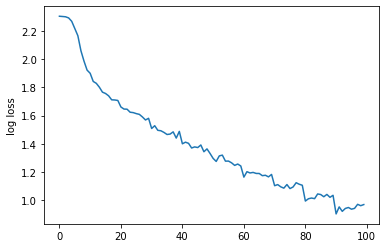

In [5]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [6]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 58.57 %


## Momentum Contrast

### Pre-Training the Encoder

In [7]:
encoder_args = TrainArgs(epochs = 20)

In [8]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.023335
Train Epoch: 2 	Loss: 0.006342
Train Epoch: 3 	Loss: 0.003071
Train Epoch: 4 	Loss: 0.002082
Train Epoch: 5 	Loss: 0.001683
Train Epoch: 6 	Loss: 0.001476
Train Epoch: 7 	Loss: 0.001347
Train Epoch: 8 	Loss: 0.001232
Train Epoch: 9 	Loss: 0.001159
Train Epoch: 10 	Loss: 0.001073
Train Epoch: 11 	Loss: 0.001034
Train Epoch: 12 	Loss: 0.000992
Train Epoch: 13 	Loss: 0.000960
Train Epoch: 14 	Loss: 0.000906
Train Epoch: 15 	Loss: 0.000876
Train Epoch: 16 	Loss: 0.000847
Train Epoch: 17 	Loss: 0.000830
Train Epoch: 18 	Loss: 0.000776
Train Epoch: 19 	Loss: 0.000783
Train Epoch: 20 	Loss: 0.000761


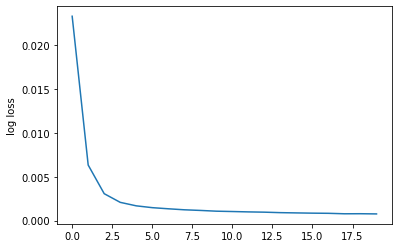

In [9]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [10]:
data, targets = encode_data()

Files already downloaded and verified


100%|██████████| 10000/10000 [01:48<00:00, 91.76it/s]


In [11]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


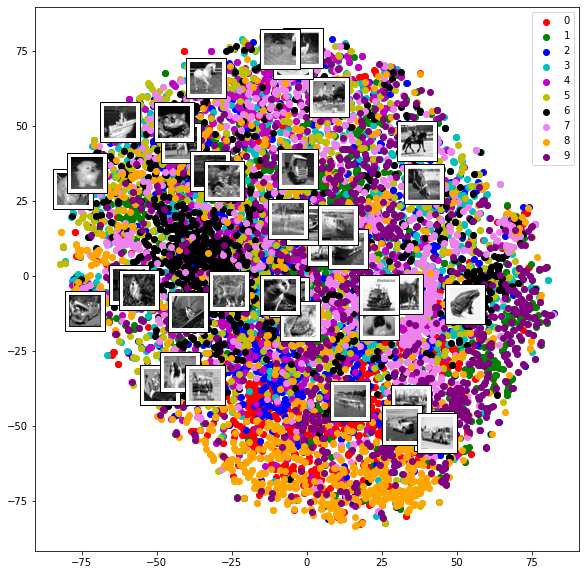

In [12]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [13]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


100%|██████████| 50000/50000 [08:44<00:00, 95.24it/s]


Files already downloaded and verified


100%|██████████| 10000/10000 [01:47<00:00, 93.19it/s]


In [14]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [15]:
svm.score(X_test, y_test)

0.6323

### Multiple Runs

In [16]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [00:54<00:00, 92.29it/s]


Files already downloaded and verified


100%|██████████| 1000/1000 [00:10<00:00, 91.50it/s]


In [17]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [18]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.300
[epoch: 2, i:   499] avg mini-batch loss: 2.295
[epoch: 3, i:   499] avg mini-batch loss: 2.273
[epoch: 4, i:   499] avg mini-batch loss: 2.183
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 1, i:   499] avg mini-batch loss: 2.303
[epoch: 2, i:   499] avg mini-batch loss: 2.303
[epoch: 3, i:   499] avg mini-batch loss: 2.302
[epoch: 4, i:   499] avg mini-batch loss: 2.302
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.300
[epoch: 1, i:   499] avg mini-batch loss: 2.288
[epoch: 2, i:   499] avg mini-batch loss: 2.241
[epoch: 3, i:   499] avg mini-batch loss: 2.185
[epoch: 4, i:   499] avg mini-batch loss: 2.125
Files already downloaded and verified


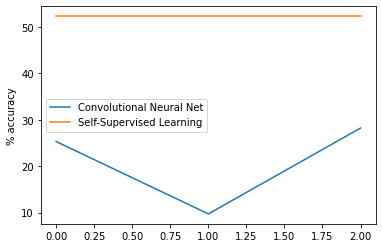

In [19]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [20]:
conv_errors

[25.3, 9.700000000000001, 28.199999999999996]

In [21]:
svm_errors

[0.523, 0.523, 0.523]

In [22]:
conv_errors

[25.3, 9.700000000000001, 28.199999999999996]